## インポート

In [31]:
from config import NUMBERS, NUMBERS3, NUMBERS4, NUMBERS3_RESULT, NUMBERS4_RESULT
import sys
import re
import difflib
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             r2_score)
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

plt.rcParams['font.family'] = 'AppleGothic'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### 調査 その1

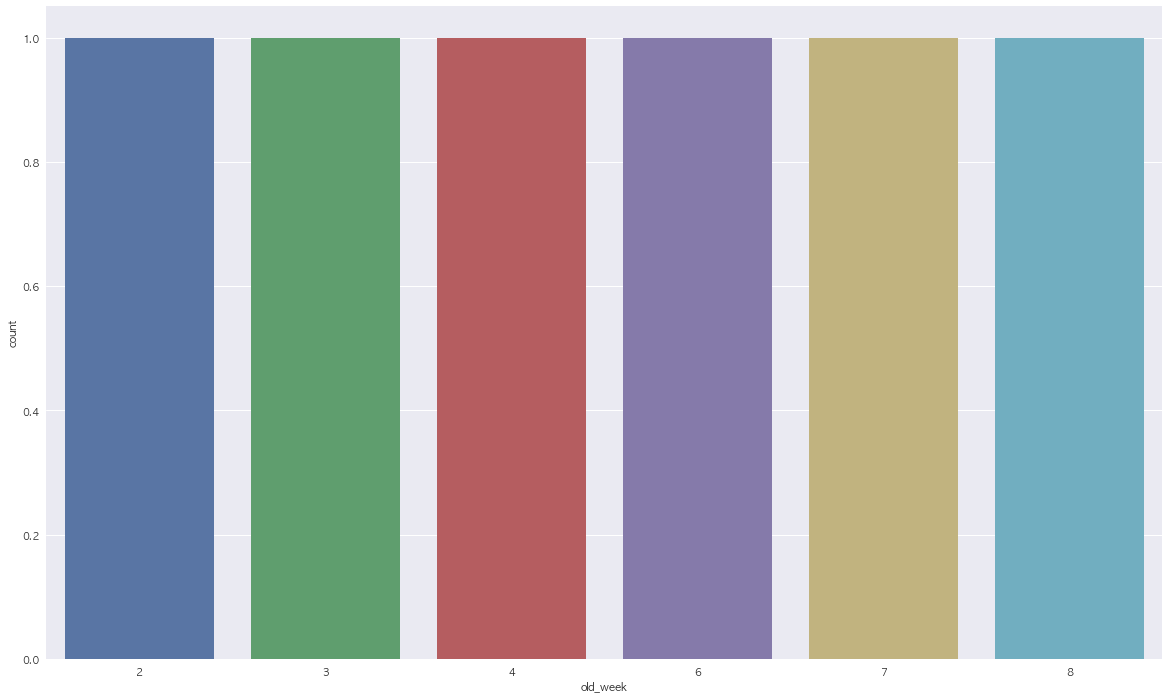

In [59]:
X = []
Y = []
Z = []
key_0 = 0
key_1 = 0
key_2 = 0
key_3 = 0
key_4 = 0
key_5 = 0
key_6  = 0 #  赤口
key_7  = 0 #  仏滅
key_8  = 0 #  友引
key_9  = 0 #  先勝
key_10 = 0 #  先負
key_11 = 0 #  大安

for _i in range(len(NUMBERS)):
    _time = NUMBERS[_i][0]
    _y = NUMBERS[_i][2]
    _x = NUMBERS3[_i][_time]
    _z = NUMBERS[_i][4]
    for _k, _v in enumerate(_x):
        if len(list(set(_y) & set(_v))) >= 3:
        #if len(list(set(_y) & set(_v))) >= 3 and _z == "赤口":
            if _k == 0:
                key_0 += 1
            elif _k == 1:
                key_1 += 1
            elif _k == 2:
                key_2 += 1
            elif _k == 3:
                key_3 += 1
            elif _k == 4:
                key_4 += 1
            elif _k == 5:
                key_5 += 1
                
            if _z == "赤口":
                key_6 += 1
            elif _z == "仏滅":
                key_7 += 1
            elif _z == "友引":
                key_8 += 1
            elif _z == "先勝":
                key_9 += 1
            elif _z == "先負":
                key_10 += 1
            elif _z == "大安":
                key_11 += 1
            
            
            _format = "{0}回 {1}:{2}({3}) [{4}]".format(_time, _y, _x[_k], _k, _z)
            # print(_time, _y, _v)
            # print(_format)
            pass
_sum     = sum([key_0, key_1, key_2, key_3, key_4, key_5])
_format1 = "前回:{0}個, 前々回:{1}個, 前回曜日:{2}個, 前々回曜日:{3}個, 前回六曜:{4}個, 前々回六曜:{5}個".format(key_0, key_1, key_2, key_3, key_4, key_5)
_format2 = "赤口:{0}個, 仏滅:{1}個, 友引:{2}個 先勝:{3}個, 先負:{4}個, 大安:{5}個".format(key_6, key_7, key_8, key_9, key_10, key_11)

data = {
    "base": [key_0, key_1, key_2, key_3, key_4, key_5],
    "old_week": [key_6, key_7, key_8, key_9, key_10, key_11]
}
_data = pd.DataFrame(data)

# sns.countplot(x="old_week", data=_data)


### 1. 前回のナンバーを特徴量とする

In [2]:
X = []
Y = []
for _i in range(len(NUMBERS)):
    _time = NUMBERS[_i][0]
    _y = NUMBERS[_i][2]
    _x = NUMBERS3[_i][_time][0]
    if len(list(set(_y) & set(_x))) >= 3:
        #print("{0} -> {1}:{2}".format(_time, _y, _x))
        Y.append(_y)
        X.append([_x])

### 2. 前回の六曜のナンバーを特徴量とする

In [33]:
X = []
Y = []
TIME = []
for _i in range(len(NUMBERS)):
    _time = NUMBERS[_i][0]
    _y = NUMBERS[_i][2]
    _x = NUMBERS3[_i][_time][4]
    if len(list(set(_y) & set(_x))) >= 3:
        # print("{0} -> {1}:{2}".format(_time, _y, _x))
        Y.append(_y)
        X.append([_x])
        TIME.append(_time)

### 3. 前回のナンバーと前回の六曜のナンバーを特徴量とする

In [93]:
X = []
Y = []
TIME = []
for _i in range(len(NUMBERS)):
    _time = NUMBERS[_i][0]
    _y = NUMBERS[_i][2]
    _x1 = NUMBERS3[_i][_time][4]
    _x2 = NUMBERS3[_i][_time][0]
    if len(list(set(_y) & set(_x1))) >= 2 or len(list(set(_y) & set(_x2))) >= 2:
        Y.append(_y)
        X.append([_x1, _x2])
        TIME.append(_time)

### 4. 抽選数を特徴量とする

In [14]:
X = []
Y = []
TIME = []
for _i in range(len(NUMBERS3_RESULT)):
    _time = NUMBERS[_i][0]
    _y = NUMBERS[_i][2]
    _x = NUMBERS3_RESULT[_i][_time]
    Y.append(_y)
    X.append(_x)
    TIME.append(_time)

### 5. 特徴量
```
- 前々回
- 前回曜日
- 前々回曜日
```

In [18]:
X = []
Y = []
TIME = []
for _i in range(len(NUMBERS)):
    _time = NUMBERS[_i][0]
    _y = NUMBERS[_i][2]
    _x1 = NUMBERS3[_i][_time][1]
    _x2 = NUMBERS3[_i][_time][2]
    _x3 = NUMBERS3[_i][_time][3]
    _z = NUMBERS[_i][4]
    if len(list(set(_y) & set(_x1))) >= 2 or len(list(set(_y) & set(_x2))) >= 2:
    # if len(list(set(_y) & set(_x1))) >= 3 or len(list(set(_y) & set(_x2))) >= 3 and _z == "先負":
        Y.append(_y)
        X.append([_x1, _x2, _x3])
        TIME.append(_time)
        pass
    #Y.append(_y)
    #X.append([_x1, _x2, _x3])
    #TIME.append(_time)

#### 予測スタート

In [19]:
y = pd.DataFrame(Y)
x = pd.DataFrame(X)

In [20]:
len(y)

273

In [21]:
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
px = x
py = model.predict(px)

In [23]:
for _i in range(len(py)):
    _py = str(int(py[_i]))
    for _k, _v in enumerate(NUMBERS):
        if _v[0] == TIME[_i]:
            if len(list(set(_v[2]) & set(_py))) >= 2:
                print(TIME[_i], _v[2], py[_i])
                pass
            # print(TIME[_i], _v[2], py[_i])

4905 936 619.5219564530325
4892 352 502.2615259423083
4833 413 514.7302339244511
4826 842 472.902754204365
4809 218 581.6057280278916
4800 794 498.81921972488095
4783 023 520.6700829404547
4731 105 503.1398428885915
4680 037 507.6173077046952
4670 039 493.0525570425366
4657 459 554.766726826806
4628 619 491.789029854201
4627 546 456.8001275132877
4417 256 521.5249733869581
4412 642 496.5667983978759
4369 457 456.13982966375806
4348 250 501.16937673659237
4338 147 477.5313637879246
4322 725 522.082673895799
4257 504 500.40726418640975
4230 549 554.465552692491
4211 507 550.8585801782951
4123 675 516.5086414456096
4094 751 513.7882707633345
4082 845 528.4455647662613
4044 853 548.6023084392606
3989 065 504.82426752776564
3988 745 504.7920055167136
3944 764 479.448628708402
3943 940 492.43161333482044
3923 583 581.9121035526815
3899 468 481.47529729912145
3896 474 497.7505998592363
3873 589 586.7185666774587
3861 295 559.5041487984397


## 決定係数

In [24]:
r2_score(y, py)

0.023040881647652944

In [25]:
model.score(x, y)

0.023040881647652944

In [26]:
model.coef_[0]

0.09686562914658062

## 予測

In [27]:
pkl_file = "numbers3_20180616.pkl"

#### 前回のナンバーと前回六曜のナンバー

In [12]:
data = [float("765"), float("642")] # 20180616

##### 前々回のナンバー, 前回曜日のナンバー, 前々回の曜日ナンバー

In [28]:
data = [float("487"), float("413"), float("173")] # 20180616

##### 抽選数

In [37]:
from statistics import mean, median,variance,stdev

X0 = []
X1 = []
X2 = []
X3 = []
for _i in range(len(NUMBERS3_RESULT)):
    _time = NUMBERS[_i][0]
    _y = NUMBERS[_i][2]
    _x0 = NUMBERS3_RESULT[_i][_time][0]
    _x1 = NUMBERS3_RESULT[_i][_time][1]
    _x2 = NUMBERS3_RESULT[_i][_time][2]
    _x3 = NUMBERS3_RESULT[_i][_time][3]
    X0.append(int(_x0))
    X1.append(int(_x1))
    X2.append(int(_x2))
    X3.append(int(_x3))
    

x0 = int(mean(X0))
x1 = int(mean(X1))
x2 = int(mean(X2))
x3 = int(mean(X3))
print(x0, x1, x2, x3)

# 20180616
data = [float("1"), float("1"), float("1"), float("1")]
# data = [float(str(x0)), float(str(x1)), float(str(x2)), float(str(x3))]

80 447 186 817


In [29]:
joblib.dump(model, pkl_file)

['numbers3_20180616.pkl']

In [30]:
clf = joblib.load(pkl_file)

In [31]:
processor = clf.predict([data])

In [32]:
processor

array([506.33564009])